ML problemlərinin qısa növləndirilməsi

1. Klassifikasiya
2. Reqressiya

## Etaplar

1. Datanın yüklənməsi
2. Datanın təmizlənməsi
3. EDA. Dataya kəşfiyyat baxışı
4. Yeni cəhətlərin yaradılması (feature engineering)
5. Uyğun modelin (modellərin) seçilməsi
6. Modelləşdirmə
7. Proqnozlaşdırma, performansın yoxlanılması

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
df = pd.read_csv("adult.csv")

In [10]:
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [9]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,40.041255,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,27.258094,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,810.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
df = pd.read_csv("adult.csv", na_values = ["?", " ?", "? "])
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,NaN,227026,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [12]:
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [14]:
# shift + tab = help
df = df.dropna(axis = 0)

In [15]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [16]:
df.shape

(45222, 15)

In [18]:
# df["age"].describe()

df.age.describe()

count    45222.000000
mean        39.964951
std         27.168063
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max        810.000000
Name: age, dtype: float64

In [19]:
df[df["age"] >= 170]

# condition df["age"] >= 170
# df[condition]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
33,230,Local-gov,258120,Some-college,10,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,<=50K
760,300,Federal-gov,340899,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,40,United-States,<=50K
1348,250,Private,86646,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,4865,0,48,United-States,<=50K
1379,330,Self-emp-not-inc,103435,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,7688,0,50,United-States,>50K
1717,240,Private,176389,Bachelors,13,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47518,180,Private,231562,HS-grad,9,Never-married,Sales,Own-child,White,Female,0,0,33,United-States,<=50K
47689,270,Private,184078,Assoc-voc,11,Divorced,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
47773,400,Federal-gov,130749,Some-college,10,Divorced,Exec-managerial,Not-in-family,Black,Female,0,0,40,United-States,<=50K
48449,200,Private,200153,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,38,United-States,<=50K


In [21]:
i = df[df["age"] >= 170].index

df.loc[i, "age"] = df.loc[i, "age"] / 10

In [22]:
df.age.describe()

count    45222.000000
mean        38.547941
std         13.217870
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64

In [23]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [26]:
df["native-country"].value_counts(normalize = True)

United-States                 0.913095
Mexico                        0.019968
Philippines                   0.006258
Germany                       0.004268
Puerto-Rico                   0.003870
Canada                        0.003604
India                         0.003251
El-Salvador                   0.003251
Cuba                          0.002941
England                       0.002631
China                         0.002499
Jamaica                       0.002278
South                         0.002233
Italy                         0.002211
Dominican-Republic            0.002145
Japan                         0.001968
Guatemala                     0.001902
Vietnam                       0.001835
Columbia                      0.001813
Poland                        0.001791
Haiti                         0.001526
Portugal                      0.001371
Iran                          0.001238
Taiwan                        0.001216
Greece                        0.001084
Nicaragua                

In [27]:
df = df[df["native-country"] == "United-States"]

In [28]:
df.shape

(41292, 15)

In [31]:
categorical_columns = df.select_dtypes("object").columns

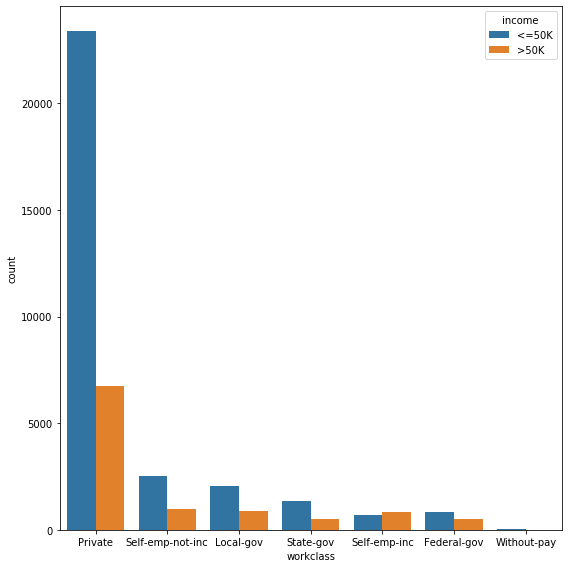

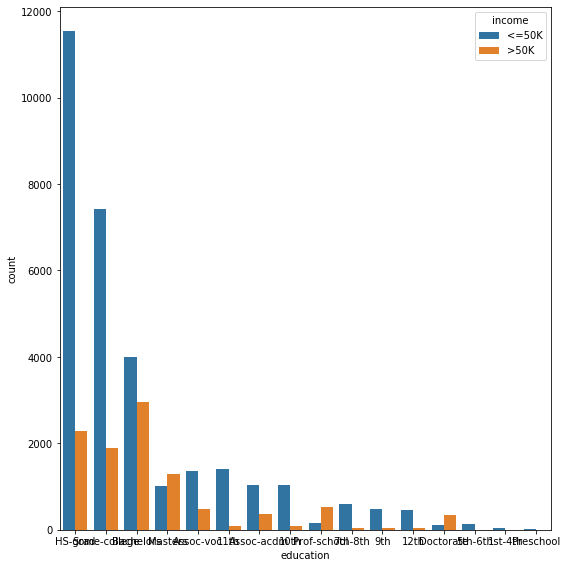

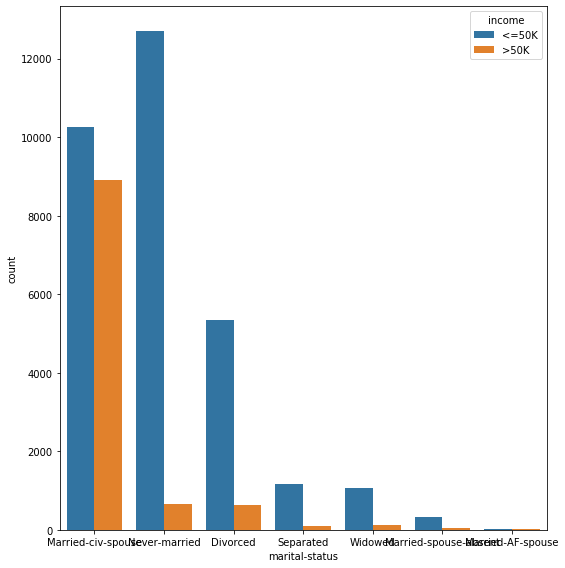

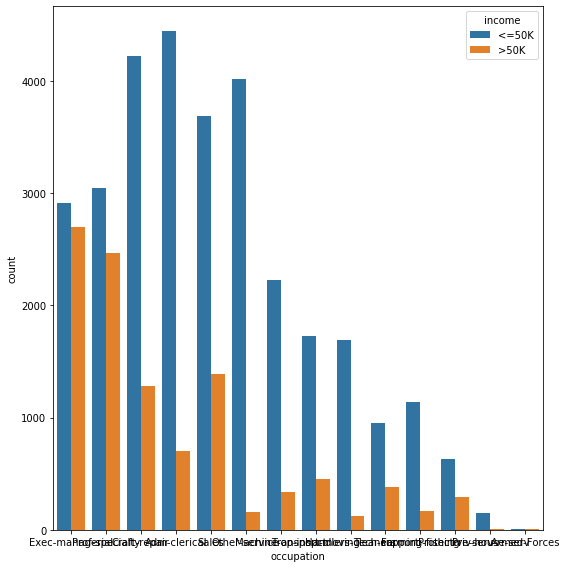

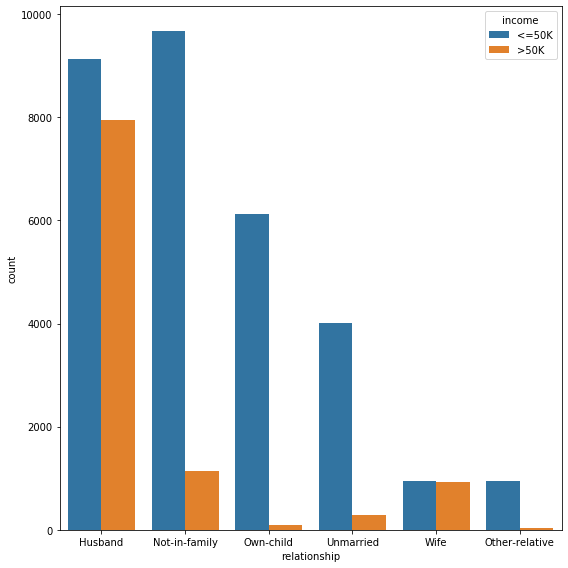

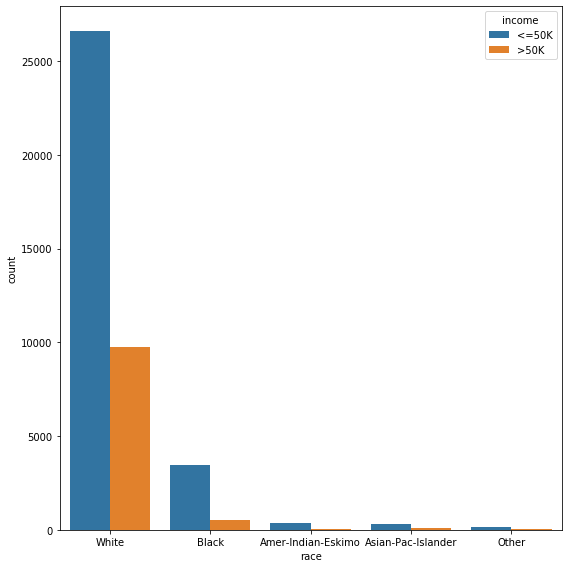

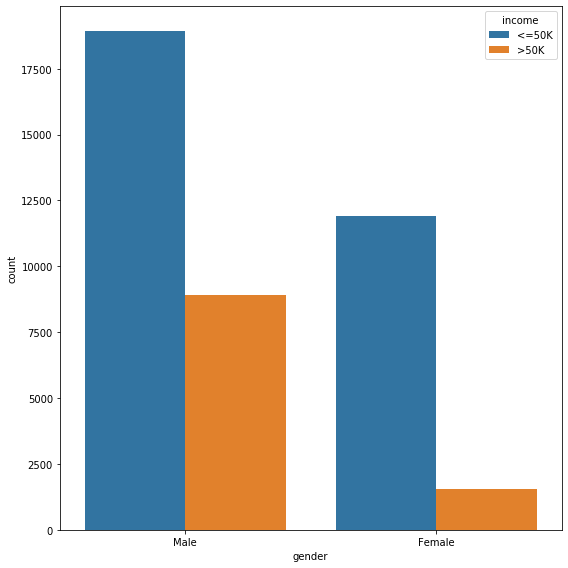

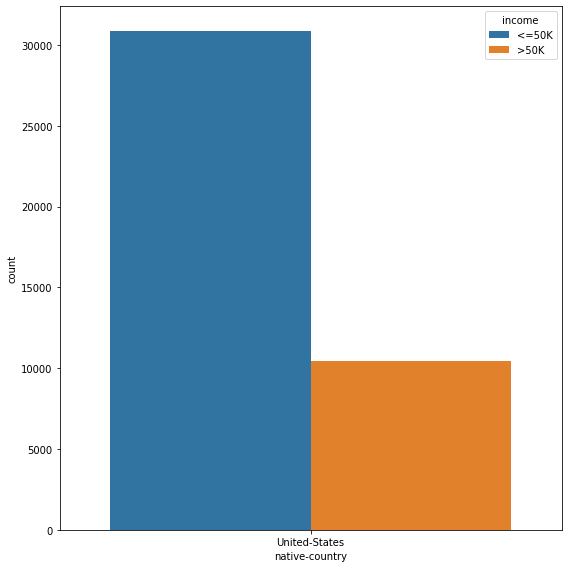

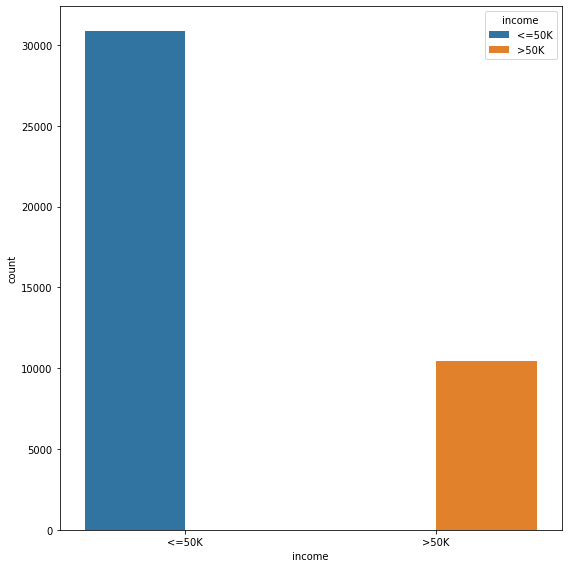

In [32]:
for i, col in enumerate(categorical_columns):
    plt.figure(num = i, figsize = (8,8))
    sns.countplot(x= col, data = df, order = df[col].value_counts().index, hue = "income")
    plt.tight_layout()

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41292 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              41292 non-null  float64
 1   workclass        41292 non-null  object 
 2   fnlwgt           41292 non-null  int64  
 3   education        41292 non-null  object 
 4   educational-num  41292 non-null  int64  
 5   marital-status   41292 non-null  object 
 6   occupation       41292 non-null  object 
 7   relationship     41292 non-null  object 
 8   race             41292 non-null  object 
 9   gender           41292 non-null  object 
 10  capital-gain     41292 non-null  int64  
 11  capital-loss     41292 non-null  int64  
 12  hours-per-week   41292 non-null  int64  
 13  native-country   41292 non-null  object 
 14  income           41292 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 6.3+ MB


In [34]:
cont_vars = df.select_dtypes(["int64", "float64"]).columns

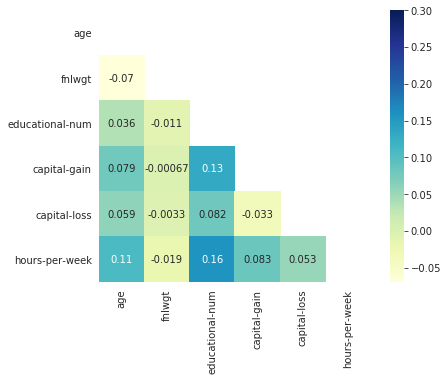

In [36]:
# corr matrix
corr = df[cont_vars].corr()

mask = np.zeros_like(corr)

mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask = mask, vmax= .3, annot = True, square=True, cmap="YlGnBu")

In [37]:
from scipy.stats import zscore

In [38]:
df[cont_vars].describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,41292.000000,4.129200e+04,41292.000000,41292.000000,41292.000000,41292.000000
mean,38.597210,1.872429e+05,10.222610,1126.758888,90.065291,40.975903
std,13.272337,1.050282e+05,2.380433,7602.228995,407.794060,12.079892
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.157840e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.767250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.346400e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [41]:
df.query("`capital-gain` > 50000")["capital-gain"].describe()

count      215.0
mean     99999.0
std          0.0
min      99999.0
25%      99999.0
50%      99999.0
75%      99999.0
max      99999.0
Name: capital-gain, dtype: float64

In [42]:
df = df[df["capital-gain"] < 50000]

In [45]:
df[df["capital-loss"] > 2300]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
129,41.0,Private,239296,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,2415,50,United-States,>50K
568,58.0,Self-emp-not-inc,25124,Assoc-voc,11,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,2377,65,United-States,<=50K
754,25.0,State-gov,77661,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Female,0,2444,40,United-States,>50K
851,41.0,Self-emp-inc,214247,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,2415,60,United-States,>50K
1097,54.0,Self-emp-inc,175339,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,2415,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48016,40.0,Self-emp-not-inc,33310,Prof-school,15,Divorced,Other-service,Not-in-family,White,Female,0,2339,35,United-States,<=50K
48179,47.0,Private,148995,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,2415,60,United-States,>50K
48419,50.0,Self-emp-inc,121441,11th,7,Never-married,Exec-managerial,Other-relative,White,Male,0,2444,40,United-States,>50K
48511,47.0,Self-emp-inc,102308,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,2415,45,United-States,>50K


In [46]:
for val in cont_vars:
    
    res = df[val].quantile([0.00, 0.95])
    lower = res.iloc[0]
    upper = res.iloc[1]
    df = df[(df[val] >= lower) & (df[val] <= upper)]

In [47]:
df.shape

(31710, 15)

In [48]:
df[cont_vars].describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,31710.000000,31710.000000,31710.000000,31710.000000,31710.0,31710.000000
mean,36.469757,173556.026648,10.018543,85.857679,0.0,39.685304
std,11.734905,82081.527891,2.169568,521.640964,0.0,9.861903
min,17.000000,13769.000000,1.000000,0.000000,0.0,1.000000
25%,27.000000,113440.750000,9.000000,0.000000,0.0,40.000000
50%,36.000000,173720.000000,10.000000,0.000000,0.0,40.000000
75%,45.000000,222596.000000,11.000000,0.000000,0.0,44.000000
max,62.000000,376680.000000,14.000000,4386.000000,0.0,60.000000


In [49]:
df = df.drop("capital-loss", axis = 1)

In [50]:
df.select_dtypes("object").columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')

In [51]:
dummy_cols = ['workclass', 'education', 'marital-status', 
              'occupation','relationship', 'race', 'gender']

# one hot encoding
# dummy encoding
# dummies

In [53]:
df[["education", "educational-num"]]

,education,educational-num
0,11th,7
1,HS-grad,9
2,Assoc-acdm,12
5,10th,6
8,Some-college,10
...,...,...
48836,Some-college,10
48837,Assoc-acdm,12
48838,HS-grad,9
48839,HS-grad,9


In [54]:
dummy_cols.pop(1)
dummy_cols

['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender']

In [55]:
dummies = pd.get_dummies(df[dummy_cols], drop_first= True )

In [56]:
df = df.drop(dummy_cols, axis = 1)
df = pd.concat([df, dummies], axis = 1)

In [57]:
df.columns

Index(['age', 'fnlwgt', 'education', 'educational-num', 'capital-gain',
       'hours-per-week', 'native-country', 'income', 'workclass_Local-gov',
       'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'relationship_Not-in-family',
       'relationship_Other-relativ

In [59]:
df.income.unique()

array(['<=50K', '>50K'], dtype=object)

In [60]:
df["income"] = df["income"].apply(lambda x: 1 if x == ">50K" else 0)

# googleIT split-apply-combine

In [63]:
df.income.mean()

0.19072847682119207

## Modeling

In [65]:
# baseline model = DummyClassifier
# baseline model = 0, hamisina 1

# statquest

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
import sklearn.metrics as metrics

In [69]:
df.education

Index(['age', 'fnlwgt', 'education', 'educational-num', 'capital-gain',
       'hours-per-week', 'native-country', 'income', 'workclass_Local-gov',
       'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'relationship_Not-in-family',
       'relationship_Other-relativ

In [74]:
X = df.drop(["income","education", "native-country"], axis = 1)
y = df["income"]


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/800px-Precisionrecall.svg.png" width="300"/>

In [71]:
def train_show_results(model, split_share = 0.3,  **kwargs):
    
    print(f"Training using {model} with {kwargs}")
    m = model(**kwargs)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = split_share, stratify = y)
    
    m.fit(X_train, y_train)
    preds = m.predict(X_test)
    print(metrics.classification_report(preds, y_test))
    
    ax = metrics.plot_roc_curve(m, X_test, y_test)
    plt.title(f"ROC-AUC curve using {str(model).split('.')[-1]}")
    plt.show()
    
# for binary check ROC AUC curve

Training using <class 'sklearn.dummy.DummyClassifier'> with {'strategy': 'uniform'}
              precision    recall  f1-score   support

           0       0.50      0.81      0.62      4803
           1       0.49      0.19      0.27      4710

    accuracy                           0.50      9513
   macro avg       0.49      0.50      0.45      9513
weighted avg       0.49      0.50      0.45      9513



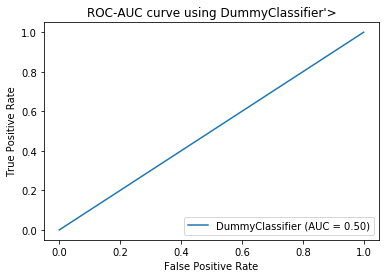

In [72]:
train_show_results(DummyClassifier, strategy = "uniform")

Training using <class 'sklearn.linear_model._logistic.LogisticRegression'> with {'C': 1000000000.0}
              precision    recall  f1-score   support

           0       1.00      0.81      0.89      9513
           1       0.00      0.00      0.00         0

    accuracy                           0.81      9513
   macro avg       0.50      0.40      0.45      9513
weighted avg       1.00      0.81      0.89      9513



C:\Users\Emil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


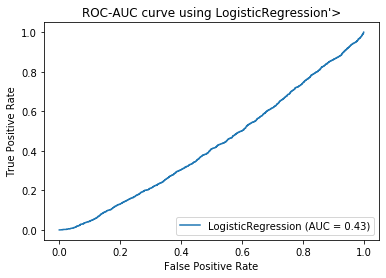

In [75]:
train_show_results(LogisticRegression, C = 1e9)

Training using <class 'sklearn.linear_model._logistic.LogisticRegression'> with {'penalty': 'l1', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      8206
           1       0.48      0.67      0.56      1307

    accuracy                           0.85      9513
   macro avg       0.71      0.78      0.74      9513
weighted avg       0.88      0.85      0.86      9513



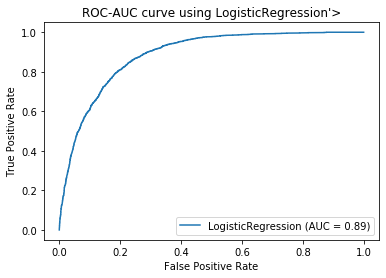

In [77]:
train_show_results(LogisticRegression, penalty = "l1", solver = "liblinear")

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Training using <class 'sklearn.tree._classes.DecisionTreeClassifier'> with {}
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      7593
           1       0.49      0.46      0.47      1920

    accuracy                           0.79      9513
   macro avg       0.68      0.67      0.67      9513
weighted avg       0.79      0.79      0.79      9513



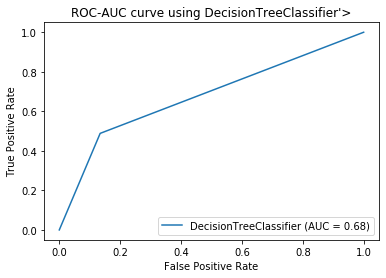

In [79]:
train_show_results(DecisionTreeClassifier)

Training using <class 'sklearn.ensemble._forest.RandomForestClassifier'> with {'max_depth': 100}
              precision    recall  f1-score   support

           0       0.93      0.88      0.91      8087
           1       0.48      0.61      0.54      1426

    accuracy                           0.84      9513
   macro avg       0.70      0.75      0.72      9513
weighted avg       0.86      0.84      0.85      9513



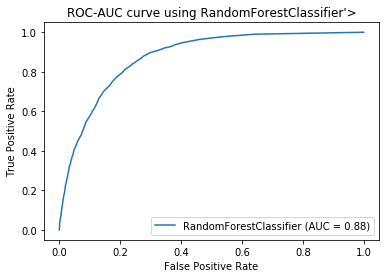

In [81]:
train_show_results(RandomForestClassifier, max_depth = 100)

In [82]:
from sklearn.neural_network import MLPClassifier

Training using <class 'sklearn.neural_network._multilayer_perceptron.MLPClassifier'> with {'hidden_layer_sizes': 100, 'max_iter': 400}


C:\Users\Emil\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


              precision    recall  f1-score   support

           0       0.96      0.84      0.90      8776
           1       0.23      0.57      0.33       737

    accuracy                           0.82      9513
   macro avg       0.60      0.71      0.61      9513
weighted avg       0.90      0.82      0.85      9513



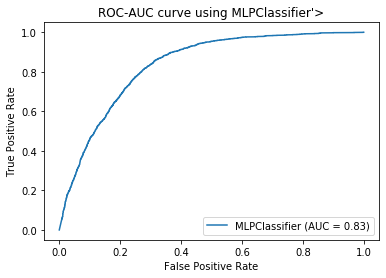

In [84]:
train_show_results(MLPClassifier, hidden_layer_sizes= (100), max_iter = 400)

In [85]:
# Ridge vs Lasso regularization